In [19]:
 import pandas as pd
from sklearn.linear_model import LogisticRegression

subscribers = pd.read_csv("bank-full.csv",delimiter=';')
subscribers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
subscribers.shape

(45211, 17)

In [21]:
subscribers = subscribers[['age','default','balance','housing','loan','duration','campaign','pdays','previous','y']]
subscribers

,age,default,balance,housing,loan,duration,campaign,previous,pdays,y
0,58,no,2143,yes,no,261,1,0,-1,no
1,44,no,29,yes,no,151,1,0,-1,no
2,33,no,2,yes,yes,76,1,0,-1,no
3,47,no,1506,yes,no,92,1,0,-1,no
4,33,no,1,no,no,198,1,0,-1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,977,3,0,-1,yes
45207,71,no,1729,no,no,456,2,0,-1,yes
45208,72,no,5715,no,no,1127,5,3,184,yes
45209,57,no,668,no,no,508,4,0,-1,no


In [22]:
subscribers = subscribers.dropna()
subscribers.shape

(45211, 10)

In [23]:
subscriber_new = subscribers.replace(('yes','no'),(1,0))
subscriber_new

,age,default,balance,housing,loan,duration,campaign,previous,pdays,y
0,58,0,2143,1,0,261,1,0,-1,0
1,44,0,29,1,0,151,1,0,-1,0
2,33,0,2,1,1,76,1,0,-1,0
3,47,0,1506,1,0,92,1,0,-1,0
4,33,0,1,0,0,198,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,0,-1,1
45207,71,0,1729,0,0,456,2,0,-1,1
45208,72,0,5715,0,0,1127,5,3,184,1
45209,57,0,668,0,0,508,4,0,-1,0


In [24]:
X = subscriber_new.iloc[:,0:9]
Y = subscriber_new.iloc[:,9]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\imran 46\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = classifier.predict_proba(X)
y_pred

array([[0.97331209, 0.02668791],
       [0.97315649, 0.02684351],
       [0.98179586, 0.01820414],
       ...,
       [0.29790932, 0.70209068],
       [0.83262735, 0.16737265],
       [0.40070611, 0.59929389]])

In [38]:
y_predicted = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})
y_predicted

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Evaluating the Logistic Regression Model.Confusion Matrix

In [39]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39089   833]
 [ 4192  1097]]


In [41]:
accuracy = ((39089+1097)/(39089+1097+833+4192))*100
accuracy 

88.88544823162505

# ROC CURVE

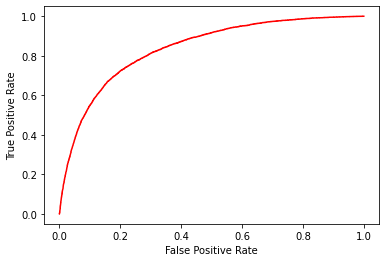

Area under curve :- 0.593272960454016


In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area under curve :-', auc)